In [1]:
import numpy;
# import matplotlib.pyplot as plt;

from tensorflow.keras.initializers import TruncatedNormal;

from tqdm import tqdm;

import numpy as np
import random

In [2]:
# Training data
feature = numpy.array(
    [
        [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], 
        [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], 
        [0.70, 0.65], [0.92, 0.45]
    ]);

label = numpy.array([1, 1, 1, 1, -1, -1, -1, -1]);

In [3]:
class AdalineGA:

    # Hyperparameters
    def __init__(self, feature, label):
        self.feature = feature;
        self.label = label;
        self.population_size = 50;
        self.generations = 200;
        self.mutation_rate = 1e-1;
        self.crossover_rate = 9e-1;

        initializer = TruncatedNormal(mean = 0.5, stddev = 0.02)(shape = (1, 3)).numpy();
        
        # Initialize population
        self.population = [];

        for _ in range(self.population_size):
            individual = {
                'weight_x1': initializer[0][0],
                'weight_x2': initializer[0][1],
                'bias': initializer[0][2]
            };
        
            self.population.append(individual);

    def select_population(self, population):
        sorted_population = sorted(population, key = self.forward);
        return sorted_population[:int(0.2 * self.population_size)];  # Select top 20%

    def crossover(self, parent1, parent2):
        if random.random() < self.crossover_rate:
            crossover_point = random.randint(0, 2);
            child1 = parent1.copy();
            child2 = parent2.copy();
            if crossover_point == 0:
                child1['weight_x1'], child2['weight_x1'] = child2['weight_x1'], child1['weight_x1'];
            elif crossover_point == 1:
                child1['weight_x2'], child2['weight_x2'] = child2['weight_x2'], child1['weight_x2'];
            else:
                child1['bias'], child2['bias'] = child2['bias'], child1['bias'];
            return child1, child2;
        else:
            return parent1, parent2;

    def mutate(self, individual):
        if random.random() < self.mutation_rate:
            individual['weight_x1'] += np.random.normal();
        if random.random() < self.mutation_rate:
            individual['weight_x2'] += np.random.normal();
        if random.random() < self.mutation_rate:
            individual['bias'] += np.random.normal();
        
        return individual;

    def forward(self, individual):
        predictions = [];
        for i in self.feature:
            prediction = (individual['weight_x1'] * i[0]) + (individual['weight_x2'] * i[1]) + individual['bias']
            predictions.append(prediction)
        mse = np.mean((self.label - predictions) ** 2);
        return mse;

    # Get the best produced individual based on loss
    def get_best_individual(self):
        
        result = [];

        for i in self.population:
            loss = self.forward(i);
            result.append({
                "weight_x1": i["weight_x1"],
                "weight_x2": i["weight_x2"],
                "bias": i["bias"],
                "loss": loss,
            })

        best_individual_index = min(result, key = lambda x: x["loss"]);
        best_individual = result[result.index(best_individual_index)];

        return best_individual["weight_x1"], best_individual["weight_x2"], best_individual["bias"], best_individual["loss"];

    def train(self):

        generations = [];
        losses = [];

        for generation in range(self.generations):
            
            print(f"Generation [{generation + 1} / {self.generations}] -", end = " ");

            new_population = [];

            selected_individuals = self.select_population(self.population);

            for i in tqdm(range(self.population_size)):

                parent1 = random.choice(selected_individuals);
                parent2 = random.choice(selected_individuals);

                child1, child2 = self.crossover(parent1, parent2);
                
                new_population.append(self.mutate(child1));
                new_population.append(self.mutate(child2));
                

            self.population = new_population;

            best_weight_x1, best_weight_x2, best_bias, loss = self.get_best_individual();

            print(f"Best weights of generation [{generation + 1}] - weight_x1: {best_weight_x1} - weight_x2: {best_weight_x2} - bias: {best_bias} - loss: {loss}\n\n");

            generations.append(generation + 1);
            losses.append(loss);

        return generations, losses;

In [4]:
model = AdalineGA(feature, label);
generation_history, losses_history = model.train();

Generation [1 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [1] - weight_x1: 0.47774091362953186 - weight_x2: -0.3533927496758654 - bias: 0.4735366404056549 - loss: 1.225921244898792


Generation [2 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [2] - weight_x1: -1.0277147964810829 - weight_x2: -0.5982444807606078 - bias: 0.4735366404056549 - loss: 0.7986208634086582


Generation [3 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49849.11it/s]


Best weights of generation [3] - weight_x1: -0.7618558293848317 - weight_x2: -0.6156820827495246 - bias: 0.4735366404056549 - loss: 0.7571334042874999


Generation [4 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49613.25it/s]


Best weights of generation [4] - weight_x1: -1.0277147964810829 - weight_x2: -0.5982444807606078 - bias: 0.8268949852049381 - loss: 0.6903394812609098


Generation [5 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49531.22it/s]


Best weights of generation [5] - weight_x1: -1.0277147964810829 - weight_x2: -0.6156820827495246 - bias: 0.8268949852049381 - loss: 0.684490148103575


Generation [6 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50087.22it/s]


Best weights of generation [6] - weight_x1: -0.7618558293848317 - weight_x2: -1.0898835677190575 - bias: 0.8268949852049381 - loss: 0.6101074701766607


Generation [7 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [7] - weight_x1: -0.7618558293848317 - weight_x2: -1.0898835677190575 - bias: 0.8268949852049381 - loss: 0.6101074701766607


Generation [8 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [8] - weight_x1: -1.124801813809176 - weight_x2: -2.462378843535672 - bias: 1.9510624367751888 - loss: 0.35033900483467384


Generation [9 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50015.55it/s]


Best weights of generation [9] - weight_x1: -1.124801813809176 - weight_x2: -2.462378843535672 - bias: 1.9510624367751888 - loss: 0.35033900483467384


Generation [10 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49967.88it/s]


Best weights of generation [10] - weight_x1: -1.4988134959031991 - weight_x2: -2.462378843535672 - bias: 1.9510624367751888 - loss: 0.3184160217242016


Generation [11 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [11] - weight_x1: -1.4988134959031991 - weight_x2: -2.462378843535672 - bias: 1.9510624367751888 - loss: 0.3184160217242016


Generation [12 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50051.36it/s]


Best weights of generation [12] - weight_x1: -1.4988134959031991 - weight_x2: -2.462378843535672 - bias: 1.9510624367751888 - loss: 0.3184160217242016


Generation [13 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49944.08it/s]


Best weights of generation [13] - weight_x1: -1.4988134959031991 - weight_x2: -2.462378843535672 - bias: 2.1271318447424217 - loss: 0.28793242002094016


Generation [14 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [14] - weight_x1: -1.842031176088397 - weight_x2: -2.462378843535672 - bias: 2.2122400732711216 - loss: 0.2533764389117337


Generation [15 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 32524.07it/s]


Best weights of generation [15] - weight_x1: -1.842031176088397 - weight_x2: -2.462378843535672 - bias: 2.2122400732711216 - loss: 0.2533764389117337


Generation [16 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50111.16it/s]


Best weights of generation [16] - weight_x1: -1.842031176088397 - weight_x2: -2.570449803614167 - bias: 2.4192019881575155 - loss: 0.2468096388556124


Generation [17 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50063.31it/s]


Best weights of generation [17] - weight_x1: -2.201187618991572 - weight_x2: -2.462378843535672 - bias: 2.4192019881575155 - loss: 0.2286922044022483


Generation [18 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49461.13it/s]


Best weights of generation [18] - weight_x1: -2.201187618991572 - weight_x2: -2.576951505415613 - bias: 2.4192019881575155 - loss: 0.22187293781943274


Generation [19 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24862.50it/s]


Best weights of generation [19] - weight_x1: -2.201187618991572 - weight_x2: -2.576951505415613 - bias: 2.4192019881575155 - loss: 0.22187293781943274


Generation [20 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49379.61it/s]


Best weights of generation [20] - weight_x1: -2.201187618991572 - weight_x2: -2.576951505415613 - bias: 2.4192019881575155 - loss: 0.22187293781943274


Generation [21 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50003.62it/s]


Best weights of generation [21] - weight_x1: -2.201187618991572 - weight_x2: -2.9922997490958587 - bias: 2.806641044584922 - loss: 0.18910380901442997


Generation [22 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49944.08it/s]


Best weights of generation [22] - weight_x1: -2.201187618991572 - weight_x2: -2.9922997490958587 - bias: 2.806641044584922 - loss: 0.18910380901442997


Generation [23 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49967.88it/s]


Best weights of generation [23] - weight_x1: -2.201187618991572 - weight_x2: -2.9922997490958587 - bias: 2.806641044584922 - loss: 0.18910380901442997


Generation [24 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50123.14it/s]


Best weights of generation [24] - weight_x1: -3.0110622406774663 - weight_x2: -2.9922997490958587 - bias: 3.122075151044756 - loss: 0.1768056286346784


Generation [25 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [25] - weight_x1: -3.0110622406774663 - weight_x2: -2.9922997490958587 - bias: 3.122075151044756 - loss: 0.1768056286346784


Generation [26 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49896.55it/s]


Best weights of generation [26] - weight_x1: -3.0110622406774663 - weight_x2: -2.9922997490958587 - bias: 3.122075151044756 - loss: 0.1768056286346784


Generation [27 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [27] - weight_x1: -3.0110622406774663 - weight_x2: -3.0016167692870552 - bias: 3.122075151044756 - loss: 0.1755931344093793


Generation [28 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49636.73it/s]


Best weights of generation [28] - weight_x1: -3.0110622406774663 - weight_x2: -3.0500474431728906 - bias: 3.122075151044756 - loss: 0.1705122494268701


Generation [29 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50039.42it/s]


Best weights of generation [29] - weight_x1: -3.0110622406774663 - weight_x2: -3.1226306547829847 - bias: 3.122075151044756 - loss: 0.1667346156249278


Generation [30 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50003.62it/s]

Best weights of generation [30] - weight_x1: -2.9559391085198614 - weight_x2: -3.1226306547829847 - bias: 3.122075151044756 - loss: 0.1627823778590648


Generation [31 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 49472.80it/s]


Best weights of generation [31] - weight_x1: -2.845831076782193 - weight_x2: -3.1226306547829847 - bias: 3.122075151044756 - loss: 0.15967582937577063


Generation [32 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49967.88it/s]


Best weights of generation [32] - weight_x1: -2.845831076782193 - weight_x2: -3.310025672235938 - bias: 3.122075151044756 - loss: 0.15760166988551533


Generation [33 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49367.98it/s]


Best weights of generation [33] - weight_x1: -2.845831076782193 - weight_x2: -3.2083525227931036 - bias: 3.122075151044756 - loss: 0.15491961183067693


Generation [34 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49554.63it/s]


Best weights of generation [34] - weight_x1: -2.845831076782193 - weight_x2: -3.310025672235938 - bias: 3.1667951433429478 - loss: 0.15112601851396953


Generation [35 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50099.19it/s]


Best weights of generation [35] - weight_x1: -2.845831076782193 - weight_x2: -3.310025672235938 - bias: 3.1667951433429478 - loss: 0.15112601851396953


Generation [36 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [36] - weight_x1: -2.845831076782193 - weight_x2: -3.310025672235938 - bias: 3.1667951433429478 - loss: 0.15112601851396953


Generation [37 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50051.36it/s]


Best weights of generation [37] - weight_x1: -2.845831076782193 - weight_x2: -3.310025672235938 - bias: 3.264926464939442 - loss: 0.1509343602103112


Generation [38 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [38] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1667951433429478 - loss: 0.15107900350342562


Generation [39 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49837.26it/s]


Best weights of generation [39] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1667951433429478 - loss: 0.15107900350342562


Generation [40 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49908.42it/s]


Best weights of generation [40] - weight_x1: -2.7915698824856507 - weight_x2: -3.2737797535998614 - bias: 3.1667951433429478 - loss: 0.15039095347949422


Generation [41 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [41] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [42 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49991.70it/s]


Best weights of generation [42] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [43 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49979.79it/s]


Best weights of generation [43] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [44 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50087.22it/s]


Best weights of generation [44] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [45 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 31361.63it/s]


Best weights of generation [45] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [46 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [46] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [47 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 55612.62it/s]


Best weights of generation [47] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [48 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [48] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [49 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50003.62it/s]


Best weights of generation [49] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [50 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49967.88it/s]


Best weights of generation [50] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [51 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [51] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [52 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [52] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [53 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [53] - weight_x1: -2.845831076782193 - weight_x2: -3.2737797535998614 - bias: 3.1957445059702305 - loss: 0.15027884496091387


Generation [54 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [54] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [55 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49920.30it/s]


Best weights of generation [55] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [56 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50051.36it/s]


Best weights of generation [56] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [57 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [57] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [58 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50123.14it/s]

Best weights of generation [58] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [59 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 33083.33it/s]


Best weights of generation [59] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [60 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49967.88it/s]


Best weights of generation [60] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [61 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [61] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [62 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49920.30it/s]


Best weights of generation [62] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [63 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49182.74it/s]


Best weights of generation [63] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [64 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49601.51it/s]

Best weights of generation [64] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [65 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 33214.32it/s]


Best weights of generation [65] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [66 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50039.42it/s]


Best weights of generation [66] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [67 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 33119.90it/s]


Best weights of generation [67] - weight_x1: -2.845831076782193 - weight_x2: -3.273815259634635 - bias: 3.1957445059702305 - loss: 0.15027709591084437


Generation [68 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25055.58it/s]


Best weights of generation [68] - weight_x1: -2.845831076782193 - weight_x2: -3.274012680970709 - bias: 3.1957445059702305 - loss: 0.1502673908975495


Generation [69 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [69] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.1957445059702305 - loss: 0.14889684658915572


Generation [70 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49896.55it/s]


Best weights of generation [70] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.1957445059702305 - loss: 0.14889684658915572


Generation [71 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [71] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.1957445059702305 - loss: 0.14889684658915572


Generation [72 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49766.30it/s]


Best weights of generation [72] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.1957445059702305 - loss: 0.14889684658915572


Generation [73 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [73] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.1957445059702305 - loss: 0.14889684658915572


Generation [74 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50099.19it/s]


Best weights of generation [74] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.238428710776988 - loss: 0.14809912496250627


Generation [75 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49461.13it/s]


Best weights of generation [75] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.238428710776988 - loss: 0.14809912496250627


Generation [76 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50099.19it/s]

Best weights of generation [76] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.238428710776988 - loss: 0.14809912496250627


Generation [77 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 49789.93it/s]


Best weights of generation [77] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.234972060003869 - loss: 0.14802813007225413


Generation [78 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50087.22it/s]


Best weights of generation [78] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.234972060003869 - loss: 0.14802813007225413


Generation [79 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 33151.31it/s]


Best weights of generation [79] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.234972060003869 - loss: 0.14802813007225413


Generation [80 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50039.42it/s]


Best weights of generation [80] - weight_x1: -2.845831076782193 - weight_x2: -3.3260152115602435 - bias: 3.219801996870482 - loss: 0.1479991261010966


Generation [81 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50051.36it/s]


Best weights of generation [81] - weight_x1: -2.845831076782193 - weight_x2: -3.374557877971643 - bias: 3.219801996870482 - loss: 0.14745053773405037


Generation [82 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [82] - weight_x1: -2.845831076782193 - weight_x2: -3.374557877971643 - bias: 3.219801996870482 - loss: 0.14745053773405037


Generation [83 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [83] - weight_x1: -2.845831076782193 - weight_x2: -3.374557877971643 - bias: 3.234972060003869 - loss: 0.14659586732825924


Generation [84 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [84] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.234972060003869 - loss: 0.14645301432917418


Generation [85 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50075.26it/s]


Best weights of generation [85] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.234972060003869 - loss: 0.14645301432917418


Generation [86 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [86] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.234972060003869 - loss: 0.14645301432917418


Generation [87 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50039.42it/s]


Best weights of generation [87] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.234972060003869 - loss: 0.14645301432917418


Generation [88 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49979.79it/s]


Best weights of generation [88] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.234972060003869 - loss: 0.14645301432917418


Generation [89 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50039.42it/s]


Best weights of generation [89] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.234972060003869 - loss: 0.14645301432917418


Generation [90 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24877.25it/s]

Best weights of generation [90] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.234972060003869 - loss: 0.14645301432917418


Generation [91 / 200] - 


100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [91] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.255307368027085 - loss: 0.1464452965757237


Generation [92 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 33151.31it/s]


Best weights of generation [92] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.255307368027085 - loss: 0.1464452965757237


Generation [93 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24986.92it/s]


Best weights of generation [93] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.255307368027085 - loss: 0.1464452965757237


Generation [94 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50015.55it/s]


Best weights of generation [94] - weight_x1: -2.822184392199075 - weight_x2: -3.374557877971643 - bias: 3.255307368027085 - loss: 0.1464452965757237


Generation [95 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49896.55it/s]


Best weights of generation [95] - weight_x1: -2.822184392199075 - weight_x2: -3.459528208717035 - bias: 3.326407495222422 - loss: 0.1451622911085177


Generation [96 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49778.12it/s]


Best weights of generation [96] - weight_x1: -2.822184392199075 - weight_x2: -3.459528208717035 - bias: 3.326407495222422 - loss: 0.1451622911085177


Generation [97 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24992.87it/s]

Best weights of generation [97] - weight_x1: -2.822184392199075 - weight_x2: -3.459528208717035 - bias: 3.31003676280021 - loss: 0.1444449107440766


Generation [98 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 49531.22it/s]


Best weights of generation [98] - weight_x1: -2.822184392199075 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14349278798946247


Generation [99 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24992.87it/s]


Best weights of generation [99] - weight_x1: -2.822184392199075 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14349278798946247


Generation [100 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 24957.18it/s]


Best weights of generation [100] - weight_x1: -2.822184392199075 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14349278798946247


Generation [101 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49849.11it/s]


Best weights of generation [101] - weight_x1: -2.822184392199075 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14349278798946247


Generation [102 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50015.55it/s]


Best weights of generation [102] - weight_x1: -2.822184392199075 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14349278798946247


Generation [103 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49991.70it/s]


Best weights of generation [103] - weight_x1: -2.822184392199075 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14349278798946247


Generation [104 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 79679.03it/s]


Best weights of generation [104] - weight_x1: -2.822184392199075 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14349278798946247


Generation [105 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 97951.99it/s]


Best weights of generation [105] - weight_x1: -2.8313540934647365 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.1433993320087426


Generation [106 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 98319.36it/s]


Best weights of generation [106] - weight_x1: -2.8313540934647365 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.1433993320087426


Generation [107 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 93123.98it/s]


Best weights of generation [107] - weight_x1: -2.8313540934647365 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.1433993320087426


Generation [108 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49391.24it/s]


Best weights of generation [108] - weight_x1: -2.8313540934647365 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.1433993320087426


Generation [109 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [109] - weight_x1: -2.8313540934647365 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.1433993320087426


Generation [110 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 93165.35it/s]


Best weights of generation [110] - weight_x1: -2.8313540934647365 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.1433993320087426


Generation [111 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 91061.75it/s]


Best weights of generation [111] - weight_x1: -2.8601177787273016 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14339332888603182


Generation [112 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 94000.54it/s]


Best weights of generation [112] - weight_x1: -2.8601177787273016 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14339332888603182


Generation [113 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 32403.46it/s]


Best weights of generation [113] - weight_x1: -2.8601177787273016 - weight_x2: -3.526301737750095 - bias: 3.326407495222422 - loss: 0.14339332888603182


Generation [114 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 98181.27it/s]


Best weights of generation [114] - weight_x1: -2.8601177787273016 - weight_x2: -3.52053514062063 - bias: 3.326407495222422 - loss: 0.14328771687659883


Generation [115 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 91658.74it/s]


Best weights of generation [115] - weight_x1: -2.8601177787273016 - weight_x2: -3.5109622276115897 - bias: 3.326407495222422 - loss: 0.14317654302760013


Generation [116 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 47074.12it/s]


Best weights of generation [116] - weight_x1: -2.8601177787273016 - weight_x2: -3.5109622276115897 - bias: 3.326407495222422 - loss: 0.14317654302760013


Generation [117 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [117] - weight_x1: -2.8601177787273016 - weight_x2: -3.5109622276115897 - bias: 3.326407495222422 - loss: 0.14317654302760013


Generation [118 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 98273.29it/s]


Best weights of generation [118] - weight_x1: -2.8601177787273016 - weight_x2: -3.5109622276115897 - bias: 3.326407495222422 - loss: 0.14317654302760013


Generation [119 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49955.98it/s]


Best weights of generation [119] - weight_x1: -2.8601177787273016 - weight_x2: -3.5109622276115897 - bias: 3.326407495222422 - loss: 0.14317654302760013


Generation [120 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 94127.11it/s]


Best weights of generation [120] - weight_x1: -2.8601177787273016 - weight_x2: -3.5109622276115897 - bias: 3.326407495222422 - loss: 0.14317654302760013


Generation [121 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49837.26it/s]


Best weights of generation [121] - weight_x1: -2.8601177787273016 - weight_x2: -3.5109622276115897 - bias: 3.326407495222422 - loss: 0.14317654302760013


Generation [122 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50195.12it/s]


Best weights of generation [122] - weight_x1: -2.8601177787273016 - weight_x2: -3.5109622276115897 - bias: 3.3553580849580507 - loss: 0.14302047122190578


Generation [123 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50075.26it/s]


Best weights of generation [123] - weight_x1: -2.876953468313693 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.1426684949264775


Generation [124 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 33052.04it/s]


Best weights of generation [124] - weight_x1: -2.876953468313693 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.1426684949264775


Generation [125 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [125] - weight_x1: -2.876953468313693 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.1426684949264775


Generation [126 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50027.48it/s]


Best weights of generation [126] - weight_x1: -2.876953468313693 - weight_x2: -3.528348256642713 - bias: 3.353050720045145 - loss: 0.1425024831642389


Generation [127 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 37389.05it/s]


Best weights of generation [127] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [128 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [128] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [129 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]

Best weights of generation [129] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [130 / 200] - 


100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [130] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [131 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50087.22it/s]


Best weights of generation [131] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [132 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [132] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [133 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50027.48it/s]


Best weights of generation [133] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [134 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [134] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [135 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50027.48it/s]


Best weights of generation [135] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [136 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49955.98it/s]


Best weights of generation [136] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [137 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49860.96it/s]


Best weights of generation [137] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [138 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49979.79it/s]


Best weights of generation [138] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [139 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50087.22it/s]


Best weights of generation [139] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [140 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49967.88it/s]


Best weights of generation [140] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.353050720045145 - loss: 0.14249556211165856


Generation [141 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [141] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.3637413876913502 - loss: 0.14244270787981805


Generation [142 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50003.62it/s]


Best weights of generation [142] - weight_x1: -2.9000940976577003 - weight_x2: -3.5109622276115897 - bias: 3.3637413876913502 - loss: 0.14244270787981805


Generation [143 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [143] - weight_x1: -2.9000940976577003 - weight_x2: -3.5126185378132155 - bias: 3.3637413876913502 - loss: 0.14241110205915486


Generation [144 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49402.87it/s]


Best weights of generation [144] - weight_x1: -2.9000940976577003 - weight_x2: -3.5126185378132155 - bias: 3.3637413876913502 - loss: 0.14241110205915486


Generation [145 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [145] - weight_x1: -2.9000940976577003 - weight_x2: -3.5270868545889846 - bias: 3.3637413876913502 - loss: 0.1422369321326133


Generation [146 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [146] - weight_x1: -2.9000940976577003 - weight_x2: -3.5270868545889846 - bias: 3.3637413876913502 - loss: 0.1422369321326133


Generation [147 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49920.30it/s]

Best weights of generation [147] - weight_x1: -2.9000940976577003 - weight_x2: -3.5270868545889846 - bias: 3.3637413876913502 - loss: 0.1422369321326133


Generation [148 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 50003.62it/s]


Best weights of generation [148] - weight_x1: -2.9000940976577003 - weight_x2: -3.5270868545889846 - bias: 3.3637413876913502 - loss: 0.1422369321326133


Generation [149 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50051.36it/s]


Best weights of generation [149] - weight_x1: -2.9000940976577003 - weight_x2: -3.5270868545889846 - bias: 3.3637413876913502 - loss: 0.1422369321326133


Generation [150 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [150] - weight_x1: -2.9000940976577003 - weight_x2: -3.5270868545889846 - bias: 3.3637413876913502 - loss: 0.1422369321326133


Generation [151 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50291.41it/s]


Best weights of generation [151] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3637413876913502 - loss: 0.14222988377350745


Generation [152 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50015.55it/s]


Best weights of generation [152] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3637413876913502 - loss: 0.14222988377350745


Generation [153 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [153] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [154 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [154] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [155 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50051.36it/s]


Best weights of generation [155] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [156 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [156] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [157 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [157] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [158 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [158] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [159 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [159] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [160 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [160] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [161 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50135.12it/s]


Best weights of generation [161] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [162 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [162] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [163 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50123.14it/s]


Best weights of generation [163] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [164 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [164] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [165 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49979.79it/s]


Best weights of generation [165] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [166 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [166] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [167 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49932.19it/s]


Best weights of generation [167] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [168 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 19810.62it/s]


Best weights of generation [168] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [169 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49872.82it/s]


Best weights of generation [169] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [170 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49601.51it/s]


Best weights of generation [170] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.3723670678252073 - loss: 0.1421044980142527


Generation [171 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 38771.53it/s]


Best weights of generation [171] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.378081755568804 - loss: 0.14210337813445234


Generation [172 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50123.14it/s]


Best weights of generation [172] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.378081755568804 - loss: 0.14210337813445234


Generation [173 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [173] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.378081755568804 - loss: 0.14210337813445234


Generation [174 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50015.55it/s]


Best weights of generation [174] - weight_x1: -2.911145159612875 - weight_x2: -3.5270868545889846 - bias: 3.378081755568804 - loss: 0.14210337813445234


Generation [175 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49944.08it/s]


Best weights of generation [175] - weight_x1: -2.911145159612875 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192828468328247


Generation [176 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [176] - weight_x1: -2.911145159612875 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192828468328247


Generation [177 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50087.22it/s]


Best weights of generation [177] - weight_x1: -2.911145159612875 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192828468328247


Generation [178 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [178] - weight_x1: -2.911145159612875 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192828468328247


Generation [179 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50051.36it/s]


Best weights of generation [179] - weight_x1: -2.911145159612875 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192828468328247


Generation [180 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 25013.74it/s]


Best weights of generation [180] - weight_x1: -2.911145159612875 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192828468328247


Generation [181 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49920.30it/s]


Best weights of generation [181] - weight_x1: -2.911145159612875 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192828468328247


Generation [182 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [182] - weight_x1: -2.911145159612875 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192828468328247


Generation [183 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [183] - weight_x1: -2.911145159612875 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192828468328247


Generation [184 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50015.55it/s]

Best weights of generation [184] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [185 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 50123.14it/s]


Best weights of generation [185] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [186 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [186] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [187 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50015.55it/s]


Best weights of generation [187] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [188 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]

Best weights of generation [188] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [189 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 49967.88it/s]


Best weights of generation [189] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [190 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 50207.13it/s]


Best weights of generation [190] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [191 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 33119.90it/s]


Best weights of generation [191] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [192 / 200] - 

100%|██████████| 50/50 [00:00<00:00, 49991.70it/s]

Best weights of generation [192] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [193 / 200] - 


100%|██████████| 50/50 [00:00<00:00, 49884.68it/s]


Best weights of generation [193] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [194 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [194] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [195 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [195] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [196 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [196] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [197 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [197] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [198 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [198] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [199 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]


Best weights of generation [199] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354


Generation [200 / 200] - 

100%|██████████| 50/50 [00:00<?, ?it/s]

Best weights of generation [200] - weight_x1: -2.913695293401084 - weight_x2: -3.542576017897274 - bias: 3.378081755568804 - loss: 0.14192150755258354




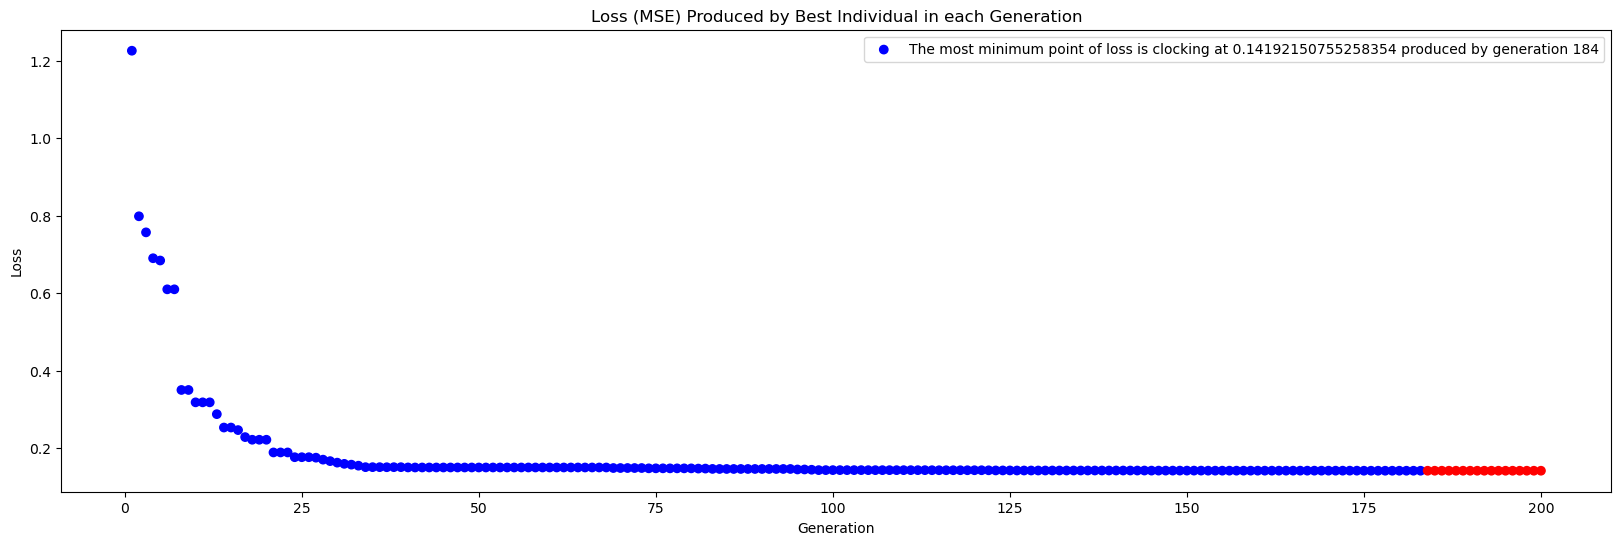

In [5]:
import matplotlib.pyplot as plt;

plt.figure(figsize = (20, 6));

# Get the most minimum loss
minimum_loss = min(losses_history);
index_of_most_minimum_loss = losses_history.index(minimum_loss);

color = ["red" if loss == minimum_loss else "blue" for loss in losses_history];

plt.scatter(generation_history, losses_history, label = "Loss", marker = "o", color = color);
plt.title("Loss (MSE) Produced by Best Individual in each Generation");
plt.xlabel("Generation");
plt.ylabel("Loss");
plt.legend([f"The most minimum point of loss is clocking at {minimum_loss} produced by generation {generation_history[index_of_most_minimum_loss]}"]);

plt.show();